In [140]:
# Import for exploration analysis, Data Visualization, stats, ML
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.graph_objects as go
sns.set_theme(style="whitegrid")
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

[1: Load and clean the data](#1)

[2: Research Questions](#2)
- [2.1: What factors majorly effect the performance?](#2.1)
- [2.2: Are employees generally over- or underestimating their performance compared to their managers' evaluations?](#2.2)
- [2.3: Do employees with longer tenures tend to receive higher ratings or more frequent promotions?](#2.3)
- [2.4: Are employees who work overtime more likely to be promoted or receive better performance reviews?](#2.4)
- [2.5: Are employees with higher education levels receiving better performance reviews or being promoted faster?](#2.5)
- [2.6: Are employees who live farther from the office less satisfied or performing at lower levels?](#2.6)
- [2.7: Do employees with a better work-life balance tend to stay longer at the company compared to those who struggle with balance?](#2.7)

## Load and Clean the Data & Perform EDA & Merge Data<a id="1"></a>

### Dataframe 1. "Performance Rating"

In [141]:
df_performance = pd.read_csv("PerformanceRating.csv")
print(df_performance.shape)
df_performance.head(12)

(6709, 11)


,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3
5,PR06,F93E-BDEF,1/4/2013,3,3,2,2,0,4,4,4
6,PR07,9E7A-1F70,1/8/2013,3,4,5,2,1,5,4,3
7,PR08,05ED-92F1,1/10/2013,4,5,4,1,1,3,3,2
8,PR09,F72D-261D,1/10/2013,4,5,2,1,1,4,5,4
9,PR10,774E-685D,1/11/2013,5,4,3,2,3,4,5,4


In [142]:
# check basic info
df_performance.info()
# let's convert 'ReviewDate' ino a date (as it can be seen above the format is M/D/Y)
df_performance['ReviewDate'] = pd.to_datetime(df_performance['ReviewDate'], format='%m/%d/%Y')
#check for missing value
print("Missing Values")
print(df_performance.isnull().sum()) 
#check for duplicate
print("Duplicates",df_performance.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB
Missing Values
PerformanceID                    

### Dataframe2: Employee

In [143]:
df_employee = pd.read_csv("Employee.csv")
print(df_employee.shape)
df_employee.head(3)

(1470, 23)


,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8


#### The dataset has 23 columns (3 extra: Education, EducationField, JobRole) from the data description, It includes 6709 reviews for 1470 employees, indicating multiple reviews per employee over the years. "Years in Most Recent Role" differs from "Years Since Last Promotion," suggesting promotions refer to salary increases rather than positional advancements.

In [144]:
# check basic info
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [145]:
# let's convert 'ReviewDate' ino a date (as it can be seen above the format is M/D/Y)
df_employee['HireDate'] = pd.to_datetime(df_employee['HireDate'], format='%Y-%m-%d')
#check for missing value
print("Missing Values")
print(df_employee.isnull().sum())
#check for duplicate
print("Duplicates:",df_employee.duplicated().sum())
# convert object data to category
list_category =['Gender','BusinessTravel', 'Department','State','Ethnicity', 'Education',
                'EducationField','JobRole', 'MaritalStatus','OverTime', 'Attrition']
for col in list_category:
    df_employee[col] = df_employee[col].astype('category')
# check uniqueness
for col in list_category:
    print('_'*30)
    print(col)
    print(df_employee[col].unique())

Missing Values
EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64
Duplicates: 0
______________________________
Gender
['Female', 'Male', 'Non-Binary', 'Prefer Not To Say']
Categories (4, object): ['Female', 'Male', 'Non-Binary', 'Prefer Not To Say']
______________________________
BusinessTravel
['Some Travel', 'No Travel ', 'Frequent Traveller']
Categories (3, object):

In [146]:
df_employee['EducationField'] = df_employee['EducationField'].replace('Marketing ', 'Marketing')

In [147]:
#Consolidating the unique ethinicity 
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('Asian or Asian American', 'Asian')
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('Mixed or multiple ethnic groups', 'Mixed')
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('Black or African American', 'Black')
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('American Indian or Alaska Native', 'Native Americain')

In [148]:
list_job = df_employee['JobRole'].unique()
for job in list_job:
    print(job)

Sales Executive
HR Business Partner
Engineering Manager
Recruiter
Data Scientist
Machine Learning Engineer
Manager
Software Engineer
Senior Software Engineer
Sales Representative
Analytics Manager
HR Executive
HR Manager


### Dataframe3: SatisfiedLevel

In [149]:
df_satisfaction = pd.read_csv("SatisfiedLevel.csv")
print(df_satisfaction.shape)
df_satisfaction.head(5)

(5, 2)


,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


### Dataframe4: RatingLevel

In [150]:
df_rating = pd.read_csv("RatingLevel.csv")
print(df_rating.shape)
df_rating

(5, 2)


,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


### Dataframe5: EducationLevel

In [151]:
df_education = pd.read_csv("EducationLevel.csv")
print(df_education.shape)
df_education.head(5)

(5, 2)


,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


In [152]:
# Replace education level with numeric
df_employee['Education'] = df_employee['Education'].replace(1, 'No qualifications')
df_employee['Education'] = df_employee['Education'].replace(2, 'High School')
df_employee['Education'] = df_employee['Education'].replace(3, 'Bachelors')
df_employee['Education'] = df_employee['Education'].replace(4, 'Masters')
df_employee['Education'] = df_employee['Education'].replace(5, 'Doctorate')

In [153]:
# Merge Data 
df_merged = pd.merge(df_performance,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
print(df_merged.shape)
df_merged.head(5)

(6709, 33)


,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
1,PR1377,79F7-78EC,2017-01-01,2,3,1,3,1,4,5,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
2,PR153,79F7-78EC,2014-01-02,5,2,2,1,1,5,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
3,PR2007,79F7-78EC,2018-01-01,5,2,5,1,1,2,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
4,PR2729,79F7-78EC,2019-01-01,4,2,5,3,0,3,5,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1


In [154]:
# Select and update rows where 'col1' is less than 'col2'
df_merged.loc[df_merged['ReviewDate'] < df_merged['HireDate'], 'EmployeeID'] = 'wrongID'
df_merged.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,PR01,wrongID,2013-01-02,5,4,5,1,0,4,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
1,PR1377,79F7-78EC,2017-01-01,2,3,1,3,1,4,5,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
2,PR153,79F7-78EC,2014-01-02,5,2,2,1,1,5,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
3,PR2007,79F7-78EC,2018-01-01,5,2,5,1,1,2,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
4,PR2729,79F7-78EC,2019-01-01,4,2,5,3,0,3,5,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1


In [155]:
print(df_merged['EmployeeID'])
#len(df_merged['EmployeeID'].unique)

0         wrongID
1       79F7-78EC
2       79F7-78EC
3       79F7-78EC
4       79F7-78EC
          ...    
6704    CA1B-0302
6705    B3A4-91F0
6706    AAD7-8DDC
6707      wrongID
6708      wrongID
Name: EmployeeID, Length: 6709, dtype: object


# Research Questions <a id="2"></a>

### 2.1: What factors majorly effect the performance? <a id="2.1"></a>

In [156]:
#Model Selction
def build_classifier(df, target, classifier, test_size=0.2, random_state=42):
    # Keep only numerical and categorical variables
    df = df.select_dtypes(include=['number', 'category'])
    df =  df.drop(columns=['ratio'])
    
    # Convert categorical variables to dummy/indicator variables
    df = pd.get_dummies(df, drop_first=True)
    
    # Separate features and target
    X = df.drop(columns=[target])
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=test_size, random_state=random_state)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

     # Build and train the classifier model
    model = classifier
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Check if the classifier has feature importances
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_names = X.columns

        # Create a DataFrame for visualization
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)
    
    return feature_importance_df.head(6)

In [157]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = build_classifier(df_2018, target='ManagerRating', classifier=DecisionTreeClassifier(random_state=42))

Accuracy: 0.5379

Classification Report:
              precision    recall  f1-score   support

           2       0.48      0.48      0.48        21
           3       0.58      0.58      0.58        52
           4       0.51      0.43      0.47        46
           5       0.55      0.69      0.61        26

    accuracy                           0.54       145
   macro avg       0.53      0.55      0.53       145
weighted avg       0.54      0.54      0.53       145



In [158]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = build_classifier(df_2018, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))

Accuracy: 0.6207

Classification Report:
              precision    recall  f1-score   support

           2       0.55      0.29      0.37        21
           3       0.62      0.79      0.69        52
           4       0.61      0.67      0.64        46
           5       0.71      0.46      0.56        26

    accuracy                           0.62       145
   macro avg       0.62      0.55      0.57       145
weighted avg       0.62      0.62      0.61       145



#### Random Forst showing more accuracy compared to other models which proven to be good fit model for HR Analytics

In [159]:
# Building Random Forest Classifier models for each year's dataset
models = {}
years = range(2013, 2023)  # List of years from 2013 to 2022

for year in years:
    data = globals()[f"df_{year}"]  # Dynamically access the DataFrame by name
    models[f"rfc_{year}"] = build_classifier(
        data, 
        target="ManagerRating", 
        classifier=RandomForestClassifier(random_state=42)
    )


Accuracy: 0.5484

Classification Report:
              precision    recall  f1-score   support

           2       0.75      0.60      0.67         5
           3       0.55      0.55      0.55        11
           4       0.47      0.70      0.56        10
           5       1.00      0.20      0.33         5

    accuracy                           0.55        31
   macro avg       0.69      0.51      0.53        31
weighted avg       0.63      0.55      0.54        31

Accuracy: 0.4737

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        10
           3       0.47      0.80      0.59        20
           4       0.47      0.50      0.49        18
           5       0.67      0.22      0.33         9

    accuracy                           0.47        57
   macro avg       0.40      0.38      0.35        57
weighted avg       0.42      0.47      0.41        57

Accuracy: 0.4217

Classification Report:
       

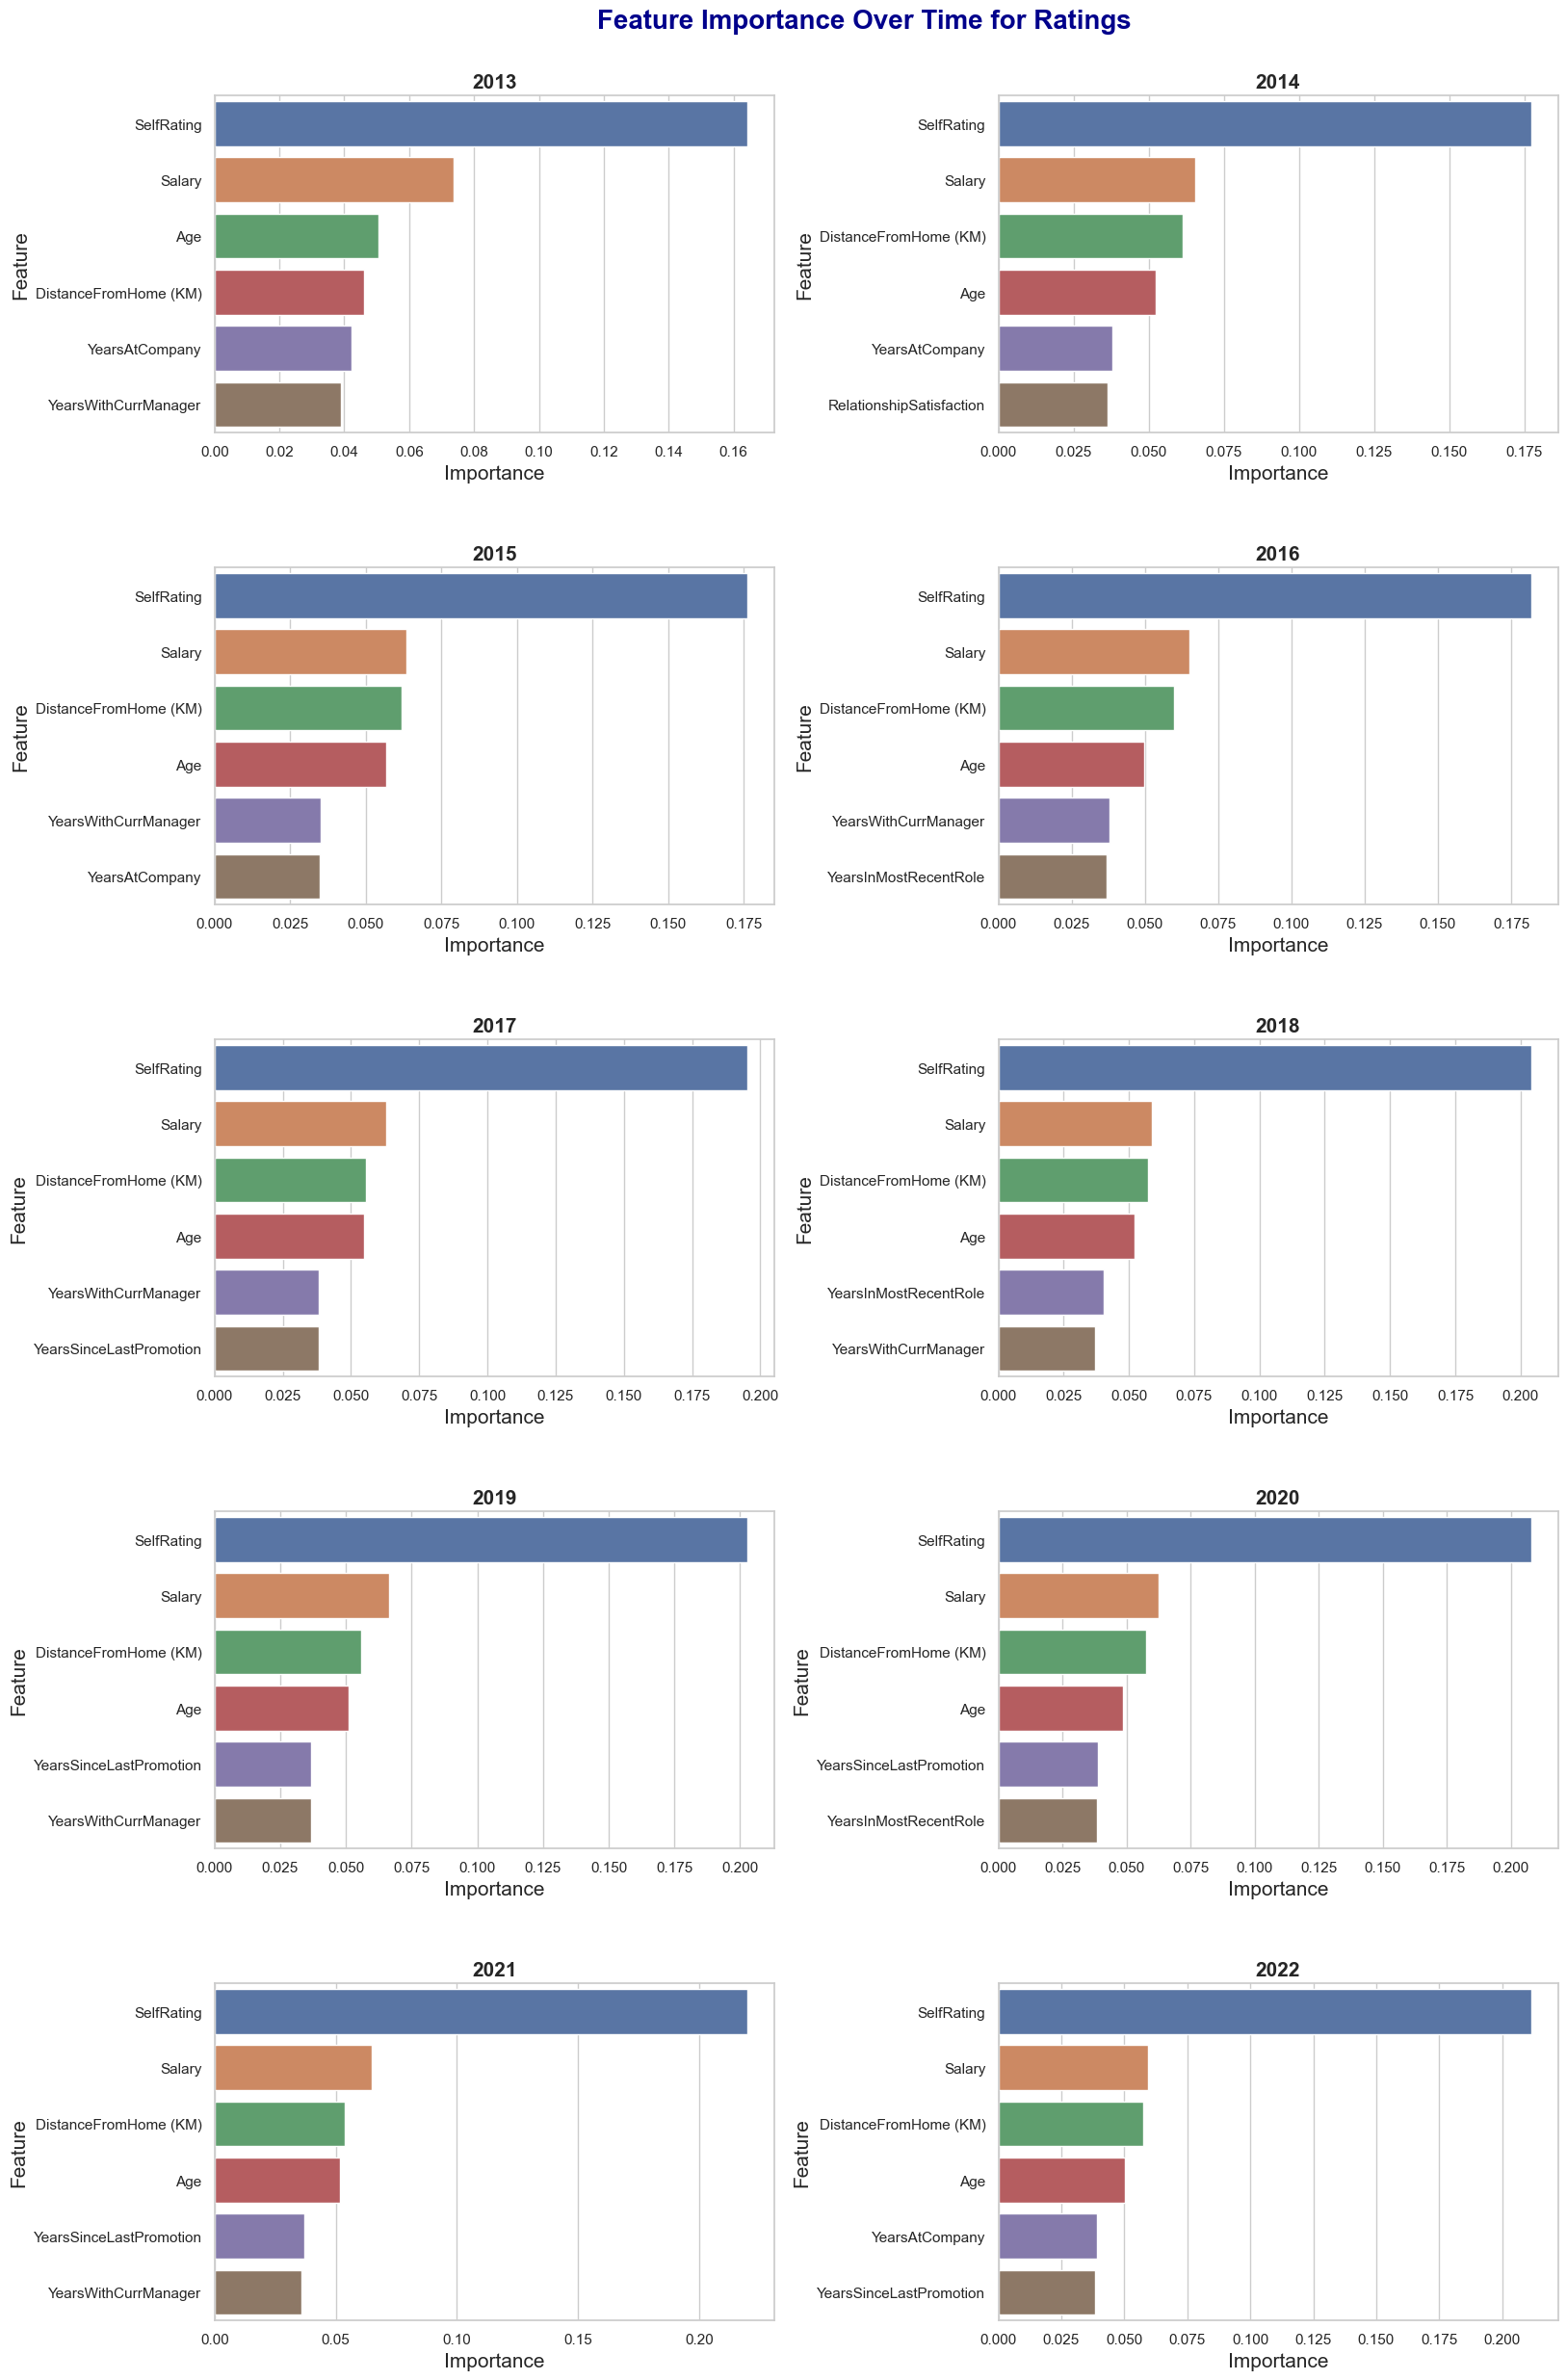

In [160]:
# Plotting feature importance across years
fig, axs = plt.subplots(5, 2, figsize=(18, 30))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle(
    'Feature Importance Over Time for Ratings',
    ha='center',
    fontsize=20,
    fontweight='bold',
    color='darkblue',
    y=0.91
)

# Iterate through years and plot feature importance
years = range(2013, 2023)
for i, year in enumerate(years):
    row, col = divmod(i, 2)  # Calculate subplot position
    sns.barplot(
        x='Importance',
        y='Feature',
        data=globals()[f"model_rfc_{year}"],
        ax=axs[row, col]
    )
    axs[row, col].set_title(
        f"{year}",
        ha='center',
        fontsize=15,
        fontweight='bold'
    )

plt.show()


##### Key Observations:
###### Self-Rating Dominance:

SelfRating consistently holds the highest importance across all years, highlighting that employees’ self-assessment strongly influences performance ratings.
###### Salary's Role:

Salary consistently ranks second, indicating its significant impact on performance evaluations, likely reflecting its motivational and performance-linked implications.
Age and Distance from Home:

These features frequently appear as the third and fourth most important factors, suggesting that both life stage (age) and commute distance influence employee performance ratings.
###### Secondary Factors:

Features like YearsAtCompany, YearsWithCurrManager, and YearsSinceLastPromotion have lower but steady importance, indicating a moderate influence on performance ratings.
###### Shifts in Other Features:

In some years, less prominent features such as YearsInMostRecentRole or RelationshipSatisfaction gain slight importance, reflecting potential shifts in workplace dynamics or organizational focus.
###### Stable Trends Over Time:

The relative importance of features remains stable over the years, suggesting consistent organizational performance evaluation criteria.

#### Implications:
This analysis could guide HR departments in focusing on self-assessments and salary structures when designing performance review systems. Additionally, less prominent factors like tenure and proximity to the workplace should still be considered as they may indirectly affect satisfaction and productivity. Overall, the charts underline the multidimensional nature of performance evaluation, balancing subjective self-assessments with objective metrics.

### 2.2: Are employees generally over- or underestimating their performance compared to their managers' evaluations? <a id="2.2"></a>

In [161]:
import pandas as pd

# Extract the year from the review date
df_performance['review_year'] = df_performance['ReviewDate'].dt.year

# Filter performance data by year
performance_by_year = {year: df_performance[df_performance['review_year'] == year] for year in range(2013, 2023)}

# Merge the performance data with employee data for each year
merged_data_by_year = {year: pd.merge(performance_by_year[year], df_employee, on="EmployeeID", how="inner") for year in performance_by_year}

# Separate data by gender for each year
male_data_by_year = {year: data[data['Gender'] == 'Male'] for year, data in merged_data_by_year.items()}
female_data_by_year = {year: data[data['Gender'] == 'Female'] for year, data in merged_data_by_year.items()}

# Calculate the correlation between ManagerRating and SelfRating for all employees, males, and females
def compute_correlation(data_dict):
    correlations = []
    for year, data in data_dict.items():
        if not data.empty:
            correlations.append(data['ManagerRating'].corr(data['SelfRating']))
        else:
            correlations.append(None)  # Handle empty dataframes
    return correlations

correlation_all = compute_correlation(merged_data_by_year)
correlation_male = compute_correlation(male_data_by_year)
correlation_female = compute_correlation(female_data_by_year)

# Calculate the ratio of ManagerRating to SelfRating for each year
def add_rating_ratio(data_dict):
    for year, data in data_dict.items():
        if not data.empty:
            data['RatingRatio'] = data['ManagerRating'] / data['SelfRating']

add_rating_ratio(merged_data_by_year)

# Prepare the results into a DataFrame for visualization
years = list(performance_by_year.keys())
correlation_results = {
    'Year': years,
    'Correlation (All)': correlation_all,
    'Correlation (Male)': correlation_male,
    'Correlation (Female)': correlation_female
}

df_correlation = pd.DataFrame(correlation_results)

# Display the resulting DataFrame
print(df_correlation)


   Year  Correlation (All)  Correlation (Male)  Correlation (Female)
0  2013           0.854631            0.872399              0.815201
1  2014           0.858090            0.852395              0.866905
2  2015           0.852794            0.844574              0.860300
3  2016           0.850713            0.860246              0.851461
4  2017           0.866478            0.858009              0.875006
5  2018           0.848042            0.846908              0.848124
6  2019           0.850452            0.853539              0.845609
7  2020           0.851902            0.853260              0.855998
8  2021           0.853007            0.858562              0.849205
9  2022           0.858533            0.862211              0.861113


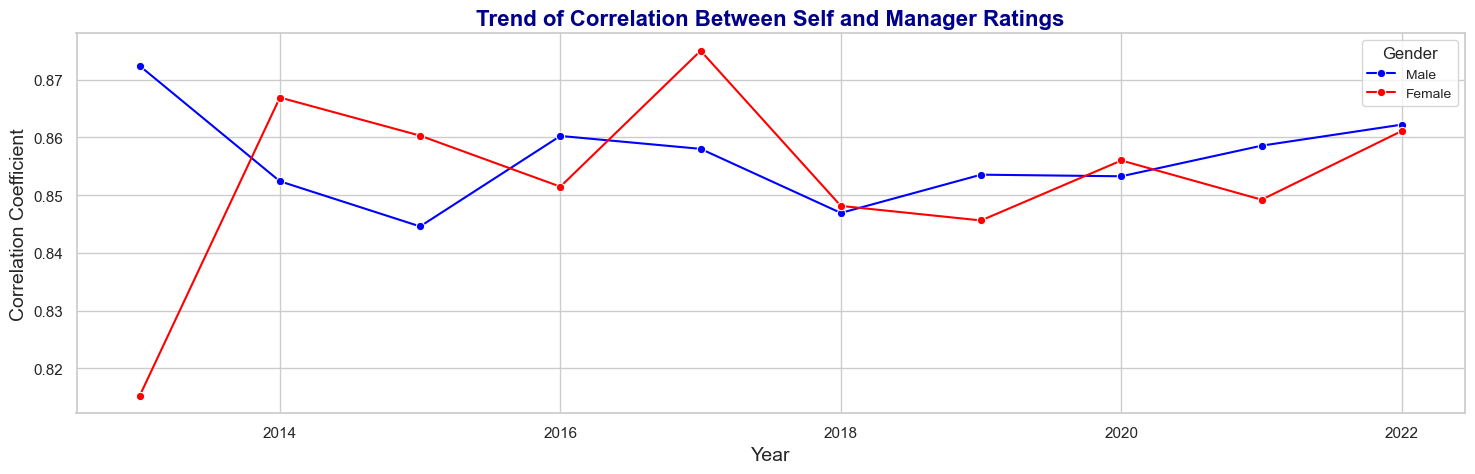

In [162]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the correlation for males
sns.lineplot(
    x='Year', y='Correlation (Male)', data=df_correlation, 
    color='blue', ax=ax, label='Male', marker='o'
)

# Plot the correlation for females
sns.lineplot(
    x='Year', y='Correlation (Female)', data=df_correlation, 
    color='red', ax=ax, label='Female', marker='o'
)

# Add title and axis labels
ax.set_title('Trend of Correlation Between Self and Manager Ratings', 
             fontsize=16, fontweight='bold', color='darkblue')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Correlation Coefficient', fontsize=14)

# Customize legend
ax.legend(title='Gender', title_fontsize=12, fontsize=10, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


# Key Trends and Insights:

1. **Correlation Over Time:**
   - Both male and female employees show fluctuations in the correlation between self and manager ratings, reflecting variability in rating alignment over the years.
   - For males, the correlation starts higher (close to 0.87 in 2014), dips in 2016, stabilizes slightly, and gradually increases after 2020.
   - For females, the correlation starts lower (around 0.82 in 2014), rises sharply in 2015, and experiences noticeable fluctuations before converging with male ratings around 2022.

2. **Gender Differences:**
   - **2014**: Male employees have a significantly stronger correlation compared to females.
   - **2015**: Female ratings align more closely with managers’ ratings, surpassing males briefly.
   - **2018**: Both genders show a noticeable dip in correlation, with females dropping lower than males.
   - **2022**: Correlation values for both genders converge, indicating a possible reduction in gender disparity regarding rating alignment.

3. **Possible Causes for Fluctuations:**
   - **2014–2015**: A sharp rise for females might indicate initiatives like diversity or inclusion programs influencing rating consistency.
   - **2018 Dip**: Could reflect changes in performance evaluation practices or increased discrepancies in self-perception and managerial assessment for both genders.
   - **Post-2020 Trends**: Gradual alignment suggests improvements in appraisal systems or increased awareness about gender fairness in evaluations.

4. **Convergence in 2022:**
   - The narrowing gap and near-identical correlation values for both genders indicate a more equitable evaluation process and better alignment of self and manager perceptions.


#### Implications

HR should implement gender-specific feedback mechanisms and continuously refine performance appraisals to ensure fairness. Training for both employees and managers is essential to align self-assessments with external evaluations and improve overall consistency.

### 2.3: Do employees with longer tenures tend to receive higher ratings or more frequent promotions?<a id="2.3"></a>

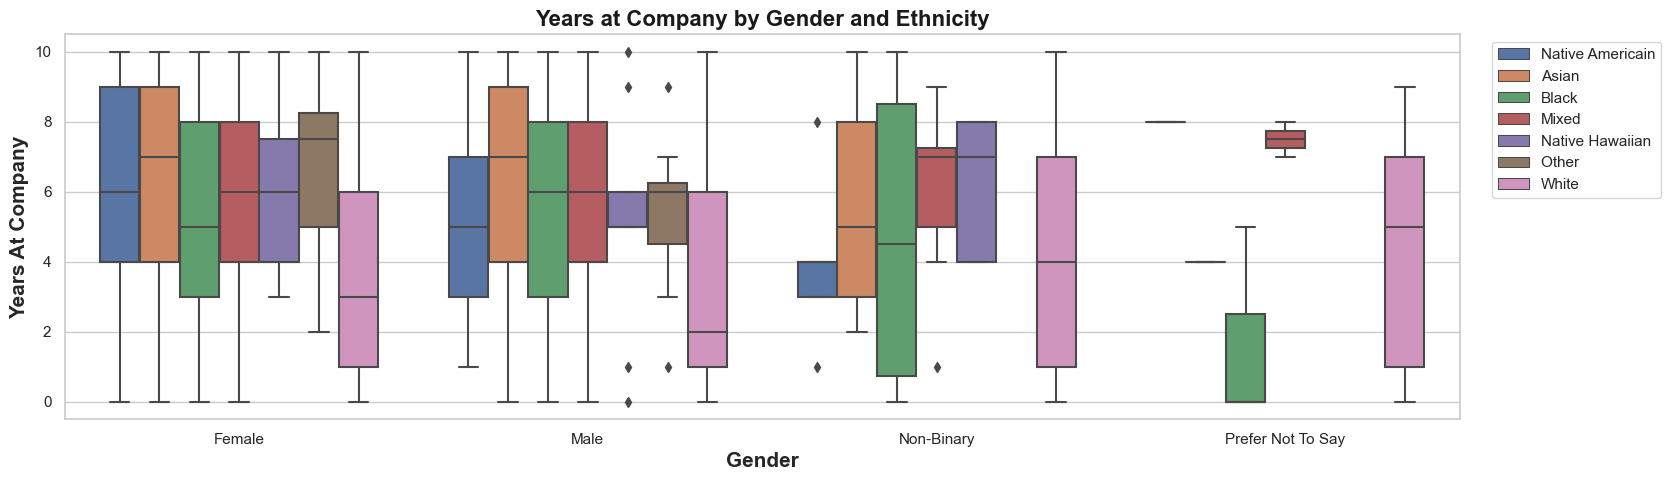

In [163]:
# Plot: Years at Company versus Gender and Ethnicity
fig, ax = plt.subplots(figsize=(18, 5))
plt.title(
    'Years at Company by Gender and Ethnicity',
    fontsize=16,
    fontweight='bold',
    color="k"
)

sns.boxplot(data=df_employee, x='Gender', hue='Ethnicity', y='YearsAtCompany', ax=ax)

# Adjust legend and labels
ax.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
ax.set_ylabel('Years At Company', fontweight='bold')
ax.set_xlabel('Gender', fontweight='bold')

plt.show()


#### From above bar plot we can clearly observe the White people has been working the company for a very long time, then Balck and Asians. Now lets see weather they are promoted frquently as beeing worke for long tenture.

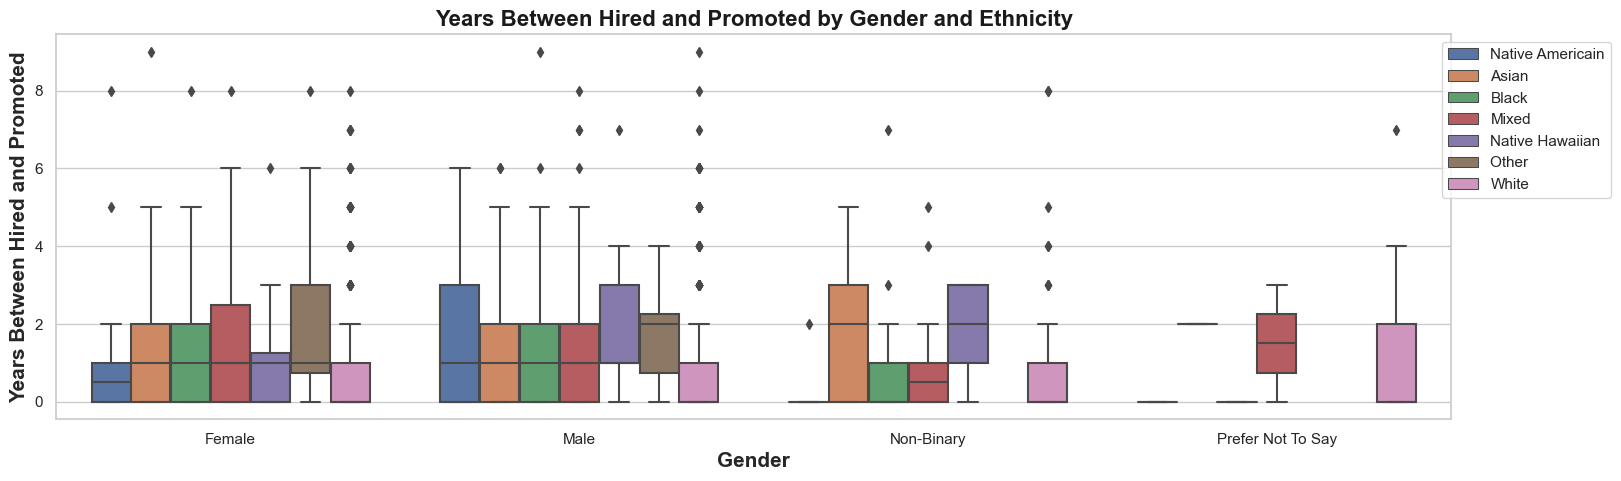

In [164]:
# Calculate year between being hired and promoted
df_employee['year_between_hired_a_promoted'] = df_employee['YearsAtCompany']-df_employee['YearsSinceLastPromotion']
df_employee['year_between_hired_a_promoted'].min()

# Plot: Years Between Hired and Promoted by Gender and Ethnicity
fig, ax = plt.subplots(figsize=(18, 5))

sns.boxplot(data=df_employee, x='Gender', hue='Ethnicity', y='year_between_hired_a_promoted', ax=ax)

# Adjust legend and labels
ax.legend(loc="upper right", bbox_to_anchor=(1.12, 1))
ax.set_ylabel('Years Between Hired and Promoted', fontweight='bold')
ax.set_xlabel('Gender', fontweight='bold')

plt.title(
    'Years Between Hired and Promoted by Gender and Ethnicity',
    fontsize=16,
    fontweight='bold',
    color="k"
)

plt.show()


#### On contrary White people are not promoted significantly although staying in company for longer tenture, Where as although Female has been stayed with company for longer tenture are not promoted as male employee in the company.

### 2.4: Are employees who work overtime more likely to be promoted or receive better performance reviews?<a id="2.4"></a>

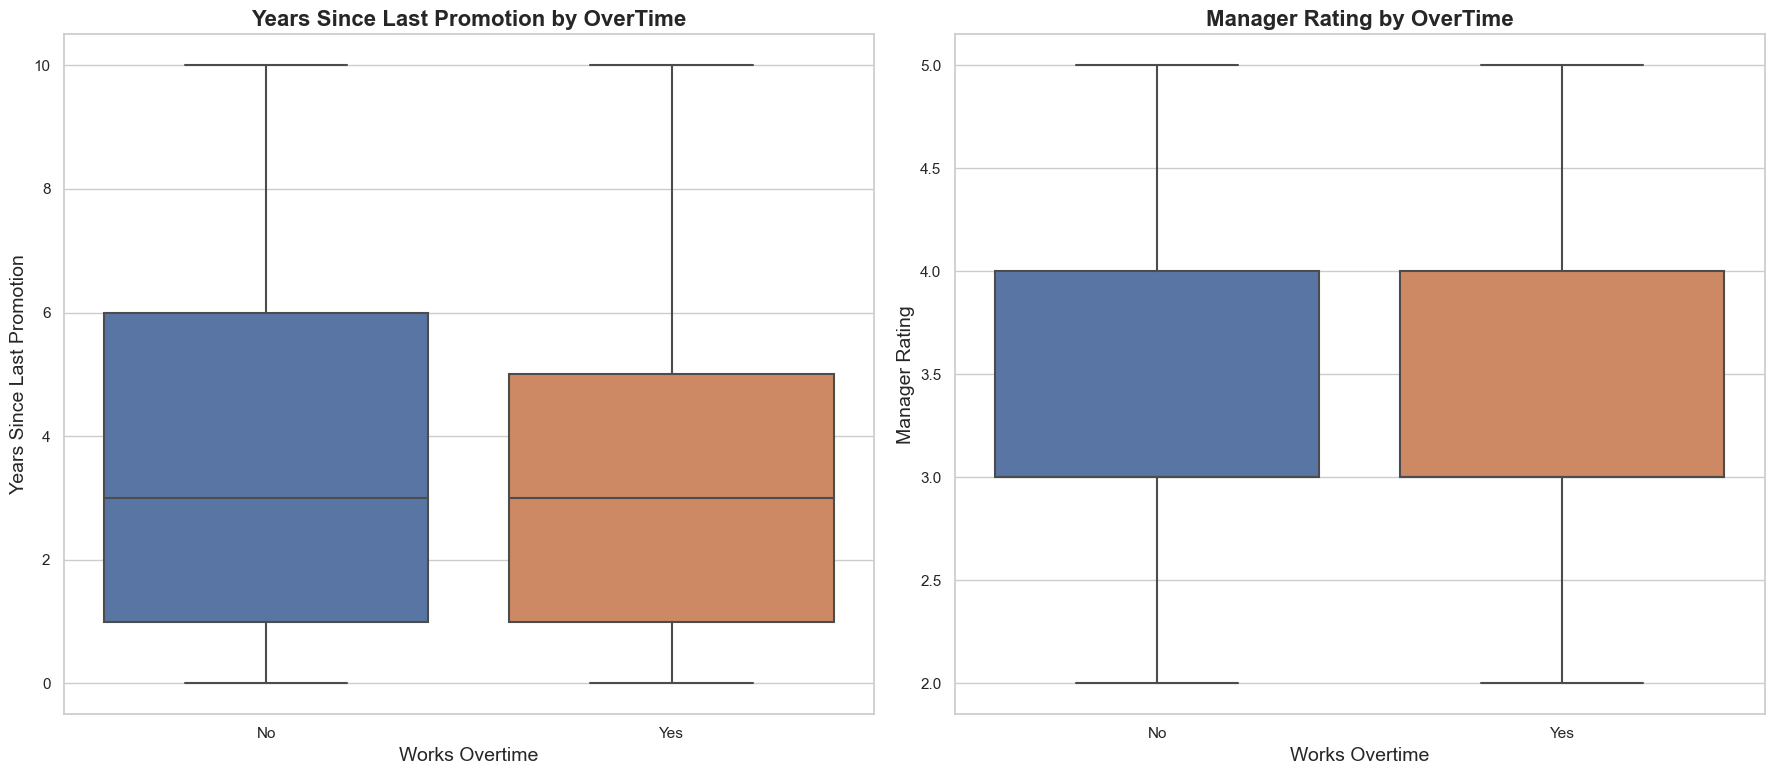

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(18, 8))

# Plot 1: Boxplot for 'YearsSinceLastPromotion' by 'OverTime'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(data=df_employee, x='OverTime', y='YearsSinceLastPromotion')
plt.title('Years Since Last Promotion by OverTime', fontsize=16, fontweight='bold')
plt.xlabel('Works Overtime', fontsize=14)
plt.ylabel('Years Since Last Promotion', fontsize=14)

# Plot 2: Boxplot for 'ManagerRating' by 'OverTime'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(data=df_merged, x='OverTime', y='ManagerRating')
plt.title('Manager Rating by OverTime', fontsize=16, fontweight='bold')
plt.xlabel('Works Overtime', fontsize=14)
plt.ylabel('Manager Rating', fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


- **Years Since Last Promotion by Overtime**: Non-overtime workers have a higher median and wider variability in years since last promotion. Overtime may influence quicker promotions.
- **Manager Rating by Overtime**: Median manager ratings are slightly lower for overtime workers, but distributions are similar, showing minimal impact of overtime on ratings.


### 2.5: Are employees with higher education levels receiving better performance reviews or being promoted faster?<a id="2.5"></a>

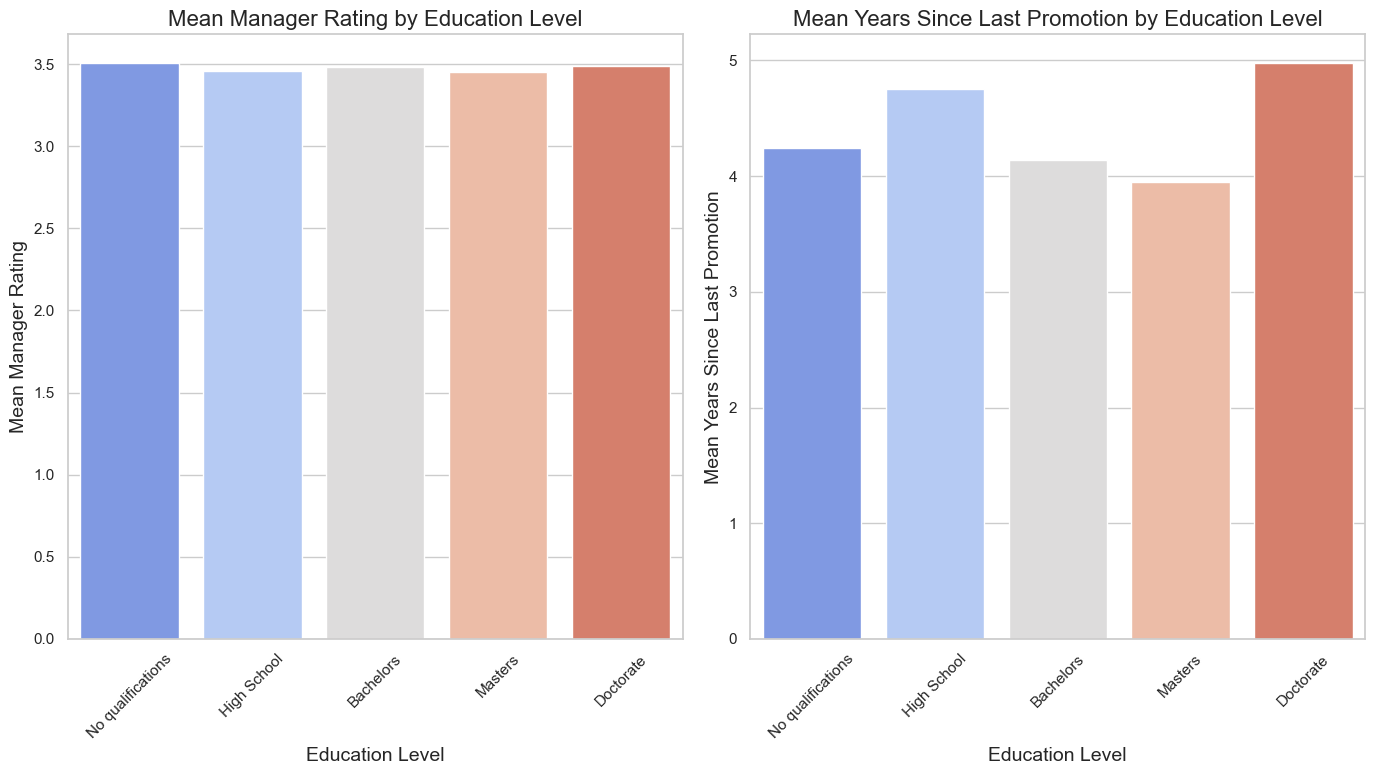

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better readability
plt.figure(figsize=(14, 8))

# First subplot: Bar Plot for Mean Manager Rating by Education Level
plt.subplot(1, 2, 1)
sns.barplot(data=df_merged, x='Education', y='ManagerRating', palette='coolwarm', errorbar=None)
plt.title('Mean Manager Rating by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Mean Manager Rating', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for readability

# Second subplot: Bar Plot for Mean Years Since Last Promotion by Education Level
plt.subplot(1, 2, 2)
sns.barplot(data=df_merged, x='Education', y='YearsSinceLastPromotion', palette='coolwarm', errorbar=None)
plt.title('Mean Years Since Last Promotion by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Mean Years Since Last Promotion', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for readability

plt.tight_layout()
plt.show()


### Insights:
- **Mean Manager Rating by Education Level**:
  - Slightly higher ratings for Masters/Doctorate holders.
  - Minimal difference across education levels; ratings are consistent.

- **Mean Years Since Last Promotion by Education Level**:
  - Doctorate holders have the highest mean years since promotion.
  - Lower education levels show quicker promotion cycles.
  - Higher education may correlate with slower promotions due to seniority or role complexity.


### 2.6: Are employees who live farther from the office less satisfied or performing at lower levels?<a id="2.6"></a>

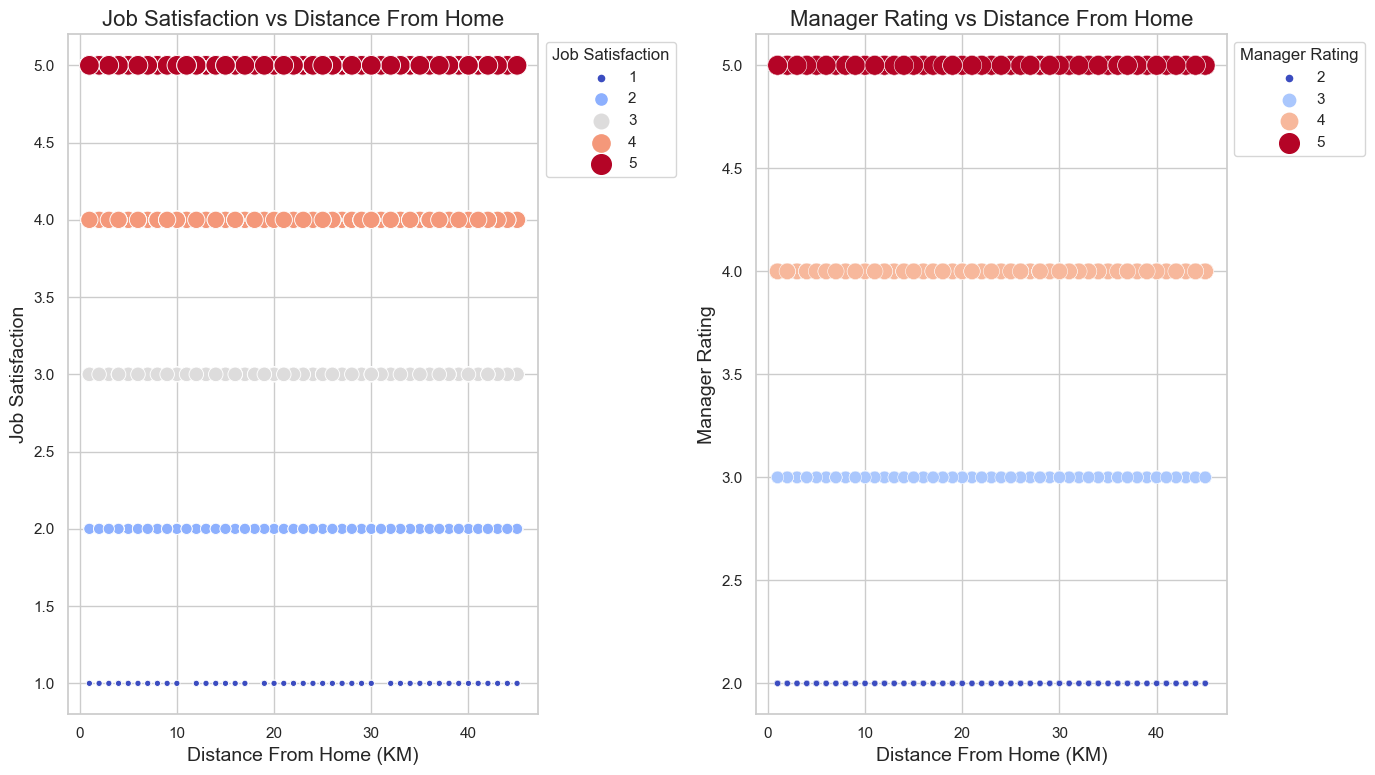

In [167]:
# Set up the figure size
plt.figure(figsize=(14, 8))

# First subplot: Scatter Plot for Job Satisfaction vs. Distance From Home
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_merged, x='DistanceFromHome (KM)', y='JobSatisfaction', hue='JobSatisfaction', palette='coolwarm', size='JobSatisfaction', sizes=(20, 200))
plt.title('Job Satisfaction vs Distance From Home', fontsize=16)
plt.xlabel('Distance From Home (KM)', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)
plt.legend(title="Job Satisfaction", bbox_to_anchor=(1, 1))

# Second subplot: Scatter Plot for Manager Rating vs. Distance From Home
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_merged, x='DistanceFromHome (KM)', y='ManagerRating', hue='ManagerRating', palette='coolwarm', size='ManagerRating', sizes=(20, 200))
plt.title('Manager Rating vs Distance From Home', fontsize=16)
plt.xlabel('Distance From Home (KM)', fontsize=14)
plt.ylabel('Manager Rating', fontsize=14)
plt.legend(title="Manager Rating", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


- **Job Satisfaction vs. Distance from Home**: Job satisfaction is discrete and consistent across all commute distances, indicating distance has little impact.
- **Manager Rating vs. Distance from Home**: Manager ratings are discrete and show no clear relationship with commute distance.


### 2.7: Do employees with a better work-life balance tend to stay longer at the company compared to those who struggle with balance?<a id="2.7"></a>

In [168]:
df_rating = df_merged[['EnvironmentSatisfaction','JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken','Attrition','WorkLifeBalance', 'SelfRating', 'ManagerRating']]

In [169]:
from scipy.stats import pointbiserialr

# Convert Attrition to binary
df_rating['AttritionBinary'] = df_rating['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate point biserial correlation
corr, p_value = pointbiserialr(df_rating['AttritionBinary'], df_rating['WorkLifeBalance'])

print(f"Point Biserial Correlation: {corr:.2f}")
print(f"P-Value: {p_value:.2e}")


Point Biserial Correlation: 0.00
P-Value: 7.79e-01


C:\Users\USER\AppData\Local\Temp\ipykernel_13488\1250289887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['AttritionBinary'] = df_rating['Attrition'].map({'Yes': 1, 'No': 0})


#### A Point Biserial Correlation of 0.00 and a P-Value of 0.779 indicate no statistically significant linear relationship between Attrition and WorkLifeBalance. This suggests work-life balance does not meaningfully impact attrition in this dataset.

C:\Users\USER\AppData\Local\Temp\ipykernel_13488\2393564886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['AttritionBinary'] = df_rating['Attrition'].map({'Yes': 1, 'No': 0})


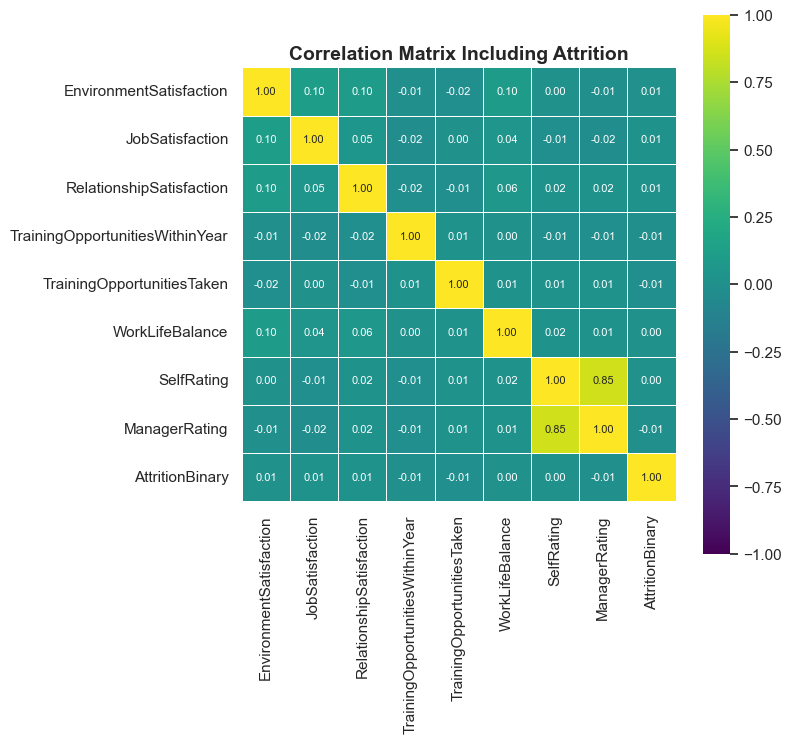

In [170]:
# Replace Attrition with binary values
df_rating['AttritionBinary'] = df_rating['Attrition'].map({'Yes': 1, 'No': 0})

# Recalculate correlation matrix
corr_matrix = df_rating.drop(columns=['Attrition']).corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    annot_kws={"size": 8}, 
    square=True, 
    cmap='viridis', 
    vmin=-1, 
    vmax=1, 
    center=0
)
plt.title("Correlation Matrix Including Attrition", fontsize=14, fontweight='bold')
plt.show()


#### The correlation matrix shows that most variables have weak correlations with one another, as most values are close to zero. Notably, **SelfRating** and **ManagerRating** exhibit a strong positive correlation (0.85), while **AttritionBinary** has minimal correlation with other variables, indicating no strong linear relationships with them.